<a href="https://colab.research.google.com/github/ggorondi/colab-strange-attractor/blob/main/strangeattractors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://examples.pyviz.org/attractors/attractors.html
#Modified code to generate strange attractor animations
!pip install git+https://github.com/holoviz/datashader.git
import numpy as np, pandas as pd, datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import inferno, viridis
from numba import jit
from math import sin, cos, sqrt, fabs
from datashader import utils
import math
from google.colab import files


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/holoviz/datashader.git to /tmp/pip-req-build-rbaop_c3
  Running command git clone -q https://github.com/holoviz/datashader.git /tmp/pip-req-build-rbaop_c3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done


In [ ]:
@jit(nopython=True)
def Clifford(x, y, a, b, c, d, *o):
    return sin(a * y) + c * cos(a * x), \
           sin(b * x) + d * cos(b * y)

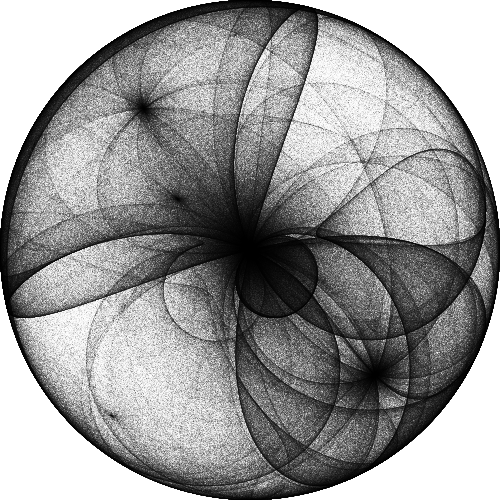

In [ ]:
#para 1 foto
n=10000000 #amount of points
@jit(nopython=True) #vroom vroom

#functions to save point locations in dataframe
def trajectory_coords(fn, x0, y0, a, b=0, c=0, d=0, e=0, f=0, n=n):
    x, y = np.zeros(n), np.zeros(n)
    x[0], y[0] = x0, y0
    for i in np.arange(n-1):
        x[i+1], y[i+1] = fn(x[i], y[i], a, b, c, d, e, f)
    return x,y
def trajectory(fn, x0, y0, a, b=0, c=0, d=0, e=0, f=0, n=n):
    x, y = trajectory_coords(fn, x0, y0, a, b, c, d, e, f, n)
    return pd.DataFrame(dict(x=x,y=y))
#create a dataframe with your params
df = trajectory(Clifford, 0,0, -3, 3, 1,-1)

cvs = ds.Canvas(plot_width = 500, plot_height = 500) #create canvas with resolution
agg = cvs.points(df, 'x', 'y') #creo que meter dataframe points en canvas segun x,y del dataframe y que se apilen
#print(agg.values[190:195,190:195],"\n")
ds.transfer_functions.Image.border=0 #nose
img=tf.shade(agg, cmap = ["white", "black"])
img
#filename="pito"
#export_path='/content/sample_data/folder'
#fmt=".png"
#utils.export_image(img=img,filename=filename, fmt=fmt,export_path=export_path, background=None)
#files.download("{}/{}{}".format(export_path,filename,fmt))

In [ ]:
n=1000000 #amount of points
@jit(nopython=True) #vroom vroom
def trajectory_coords(fn, x0, y0, a, b=0, c=0, d=0, e=0, f=0, n=n):
    x, y = np.zeros(n), np.zeros(n)
    x[0], y[0] = x0, y0
    for i in np.arange(n-1):
        x[i+1], y[i+1] = fn(x[i], y[i], a, b, c, d, e, f)
    return x,y
def trajectory(fn, x0, y0, a, b=0, c=0, d=0, e=0, f=0, n=n):
    x, y = trajectory_coords(fn, x0, y0, a, b, c, d, e, f, n)
    return pd.DataFrame(dict(x=x,y=y))

In [ ]:
%%time
l=1
a=[0]*l
b=[0]*l
c=[-1.3]*l
d=[-1.3]*l
e=[-1.8]*l
f=[-4.4+0.01*x for x in range(l)]
dflist=[trajectory(Clifford, a, b, c, d, e, f) for a,b,c,d,e,f in zip(a,b,c,d,e,f)]
#df = trajectory(Clifford, 0, 0, -1.3, -1.3, -1.8, -5)

CPU times: user 10.8 s, sys: 1.17 s, total: 11.9 s
Wall time: 11.9 s


In [ ]:
#plot and 
for df,numb in zip(dflist,range(len(dflist))):
  cvs = ds.Canvas(plot_width = 700, plot_height = 700)
  agg = cvs.points(df, 'x', 'y')
  #print(agg.values[190:195,190:195],"\n")
  ds.transfer_functions.Image.border=0
  img=tf.shade(agg, cmap = ["white", "black"])
  filename="pee"+str(numb)
  utils.export_image(img=img,filename=filename, fmt=".png",export_path='/content/sample_data/folder', background=None)

In [ ]:
!zip -r /content/fotos.zip /content/sample_data/folder
from google.colab import files
files.download("/content/fotos.zip")